In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from lmfit.models import ExponentialModel, GaussianModel
from matplotlib import cm

data10keV = pd.read_csv('data10keV.csv')
data30keV = pd.read_csv('data30keV.csv')
data50keV = pd.read_csv('data50keV.csv')
data70keV = pd.read_csv('data70keV.csv')
data90keV = pd.read_csv('data90keV.csv')
fine10keV = pd.read_csv('fine10keV.csv')
fine30keV = pd.read_csv('fine30keV.csv')
fine50keV = pd.read_csv('fine50keV.csv')
fine70keV = pd.read_csv('fine70keV.csv')
fine90keV = pd.read_csv('fine90keV.csv')

In [2]:
def plot3dVacancy(DEPTH,data,thickness,lab, ax):
    model1 = GaussianModel()
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 2e8, vary=True)
    params['center'].set(value = 0, vary=True)
    params['sigma'].set(value = 7.5, vary=True)
    model_fit = model.fit(data, params, x=DEPTH)
    fit_x = np.linspace(0,np.array(DEPTH)[-1],1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    # if lab == 0:
        # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
    ax.plot(fit_x, fitcurve,  linestyle = '--', lw = 2)
    # else:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
    #     ax.plot(fit_x, fitcurve,  linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 3)
    
    ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 

    # if lab == 0:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
    #     plt.plot(DEPTH, data,  linestyle = '--', lw = 1.3)
    # else:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
    #     plt.plot(DEPTH, data,   linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    # plt.fill_between(DEPTH, 0, data, step='mid', alpha=0.1) 

In [3]:
def plot3dSilicon(DEPTH,data,thickness,c, ax):
        ax.plot(DEPTH, data, lw = 2, color = c)
        # ax.plot(DEPTH, data, lw = 2.5, color = 'aqua')

In [4]:
def plot3dSilicon1(DEPTH,data,thickness,c):
        plt.plot(DEPTH, data, lw = 2, color = c, label = thickness)
        plt.yscale('log')
        # plt.plot(DEPTH, data, lw = 2, color = 'aqua')

In [5]:
def plot3dGallium(depth,data,thickness,c,ax):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 1e6, vary=True)
    params['center'].set(value = 10, vary=True)
    params['sigma'].set(value = 3, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,80,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)

    ax.plot(fit_x, fitcurve, lw = 2, color = c, linestyle = '-.',label = str(thickness)+' keV')
    # plt.plot(fit_x, fitcurve, lw = 1, color = 'k', label = 'Gallium Ion Distribution')

    # if lab == 0:
    #     plt.plot(depth, data, lw = 1, color = 'k')
    # else:
    #     plt.plot(depth, data, lw = 1, color = 'k', label = 'Gallium Ion Distribution')

In [6]:
cmap = cm.cool  # You can choose a different colormap
colors = [cmap(i / 5) for i in range(5)]

cmap = cm.gray # You can choose a different colormap
colors2 = [cmap(i / 5) for i in range(5)]

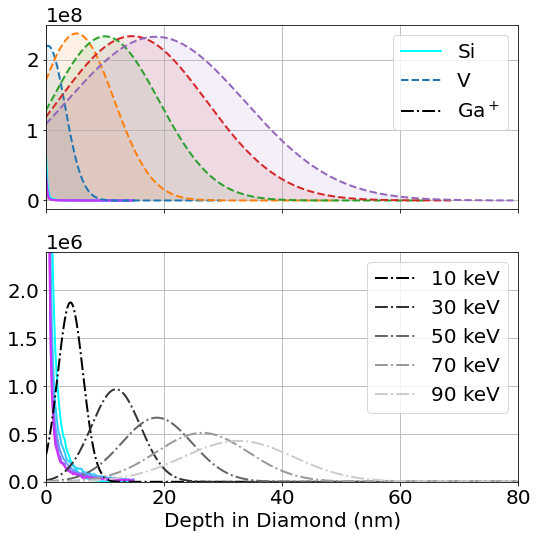

In [7]:
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
fig, axs = plt.subplots(2,1,figsize=(20*cm, 20*cm), sharex=True, gridspec_kw={'height_ratios': [4, 5]})
# fig, axs = plt.subplots(2,1,figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [4, 5]})
axs[0].grid()
# axs[0].set_xlim(0, 80)
# axs[0].set_xlabel('Depth in Diamond (nm)')
# axs[0].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')
# fig.text(0.0, 0.5, 'Density per Dose ($cm^{-3}$/$cm^{-2}$)', va='center', rotation='vertical')

plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, colors[0], axs[0])
plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,colors[1], axs[0])
plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,colors[2], axs[0])
plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,colors[3], axs[0])
plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,colors[4], axs[0])

# plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, 'C0', axs[0])
# plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,'C1', axs[0])
# plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,'C2', axs[0])
# plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,'C3', axs[0])
# plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,'C4', axs[0])


plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, axs[0])
plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, axs[0])
plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, axs[0])
plot3dVacancy(data70keV['DEPTH'][3:],data70keV['C'][3:]*1e8, 70,0, axs[0])
plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, axs[0])

axs[0].plot([],[],lw = 2, color = 'aqua', label = 'Si')
axs[0].plot([],[],lw = 2, color = 'C0', linestyle = '--',label = 'V')
axs[0].plot([],[],lw = 2, color = 'k', linestyle = '-.',label = 'Ga$^+$')
axs[0].legend()

axs[1].grid()
axs[1].set_xlim(0, 80)
axs[1].set_ylim(0, 2.4e6)
axs[1].set_xlabel('Depth in Diamond (nm)')
# axs[1].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

# plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, axs[1])
# plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, axs[1])
# plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, axs[1])
# plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0, axs[1])
# plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, axs[1])

plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, colors[0], axs[1])
plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,colors[1], axs[1])
plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,colors[2], axs[1])
plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,colors[3], axs[1])
plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,colors[4], axs[1])

plot3dGallium(data10keV['DEPTH'],data10keV['Ga'], 10,colors2[0], axs[1])
plot3dGallium(data30keV['DEPTH'],data30keV['Ga'], 30,colors2[1], axs[1])
plot3dGallium(data50keV['DEPTH'],data50keV['Ga'],50,colors2[2], axs[1])
plot3dGallium(data70keV['DEPTH'],data70keV['Ga'], 70,colors2[3], axs[1])
plot3dGallium(data90keV['DEPTH'],data90keV['Ga'], 90,colors2[4], axs[1])

axs[1].legend()
fig.tight_layout()


fig.savefig('fffffffff.pdf', format= 'pdf')